<a href="https://colab.research.google.com/github/AmnaAlsuwaidi/DS/blob/main/Activity2_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [4]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [5]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [7]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [8]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [9]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-9-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [10]:
#merged_data.dtypes

In [11]:
pollution_data = merged_data[['pm10','neighborhood']]

In [12]:
pollution_data.shape[0]

118495

In [13]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [14]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [15]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [16]:
pollution_data['pm10'].min()

0.0

In [17]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [18]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [19]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [20]:
joined_table.show(5) # Display the first 5 rows

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [24]:
print("Number of rows= ", joined_table.num_rows, ", Number of Columns= ", len(joined_table.labels))  # Get number of rows and columns

Number of rows=  118495 , Number of Columns=  2


In [27]:
# Check for missing values in the 'joined_table' using Table methods
missing_values ={col: np.sum(joined_table.column(col) == None) for col in joined_table.labels}
print(f"Number of missing values in  {missing_values}")

# Keep only rows where finite number (not NaN or Inf)
joined_table = joined_table.where(np.isfinite(joined_table.column('pm10')))
print(f"Updated number of rows: {joined_table.num_rows}")

Number of missing values in  {'pm10': 0, 'neighborhood': 0}
Updated number of rows: 118495


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [34]:
pollution_data = merged_data[['pm10', 'neighborhood', 'temperature', 'humidity', 'pm25', 'borough']]
joined_table = Table().from_df(pollution_data)

# Define a function to compute summary statistics
def summary_statistics(column):
    return make_array(np.mean(column), np.median(column), np.min(column), np.max(column))

# Get the columns using .column()
temperature_col = joined_table.column('temperature')
humidity_col = joined_table.column('humidity')
pm25_col = joined_table.column('pm25')

# Compute statistics using .apply() on the columns
temperature_stats = summary_statistics(temperature_col)
humidity_stats = summary_statistics(humidity_col)
pm25_stats = summary_statistics(pm25_col)


# Create the table using the calculated statistics
stats_table = Table().with_columns(
    "Attribute", make_array("Temperature", "Humidity", "PM25"),
    "Mean", make_array(temperature_stats.item(0), humidity_stats.item(0), pm25_stats.item(0)),
    "Median", make_array(temperature_stats.item(1), humidity_stats.item(1), pm25_stats.item(1)),
    "Min", make_array(temperature_stats.item(2), humidity_stats.item(2), pm25_stats.item(2)),
    "Max", make_array(temperature_stats.item(3), humidity_stats.item(3), pm25_stats.item(3))
)

# Display the table
stats_table.show()

Attribute,Mean,Median,Min,Max
Temperature,8.24158,7.2,-7.9,10471
Humidity,50.1549,46.2,0,104.2
PM25,7.37452,3.02,0,3267.02


In [35]:
borough_pm25_avg = joined_table.group('borough', np.mean).select('borough', 'pm25 mean')
borough_pm25_avg.relabel('pm25 mean', 'avg_pm25')
borough_pm25_avg.show()
#Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
#Display the results in a new table.

borough,avg_pm25
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

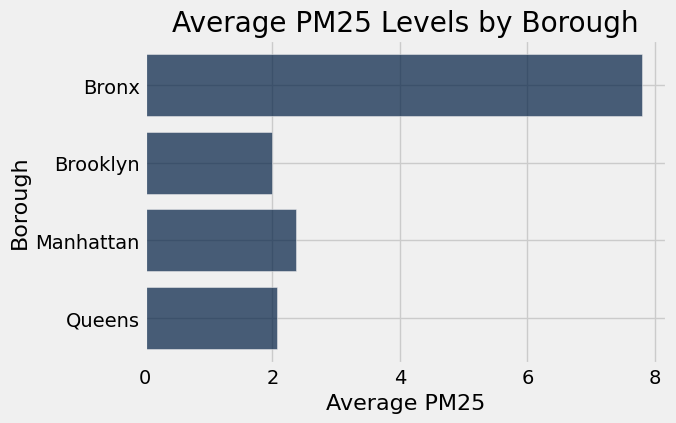

In [36]:
# borough_pm25_avg' contains 'neighborhood' and 'avg_pm25' columns
borough_pm25_avg.barh('borough', 'avg_pm25')
plt.title('Average PM25 Levels by Borough')
plt.xlabel('Average PM25')
plt.ylabel('Borough')
plt.show()

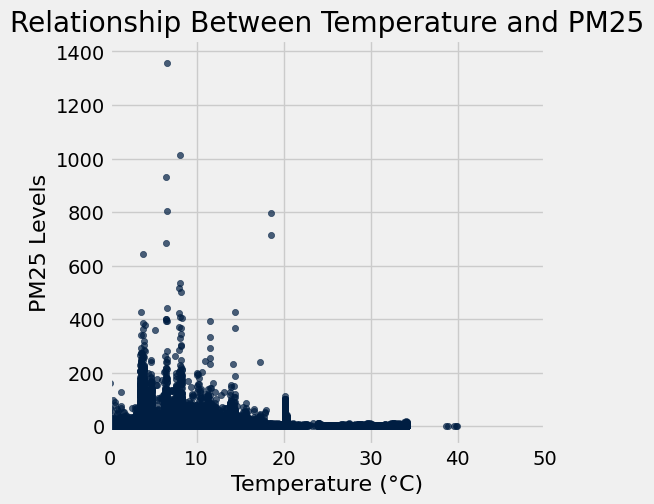

In [38]:
#Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter().
#Add appropriate labels and a title to the plot.

no_outliers=joined_table.where(joined_table.column('temperature') < 50)
no_outliers=joined_table.where(joined_table.column('pm25') < 2000)

# Set x-axis limits
no_outliers.scatter('temperature','pm25')

# Add labels and title
#for better visaulization of the data I used this command plt.xlim(0, 50)
plt.xlim(0, 50)
plt.xlabel("Temperature (°C)")
plt.ylabel("PM25 Levels")
plt.title("Relationship Between Temperature and PM25")
plt.show()

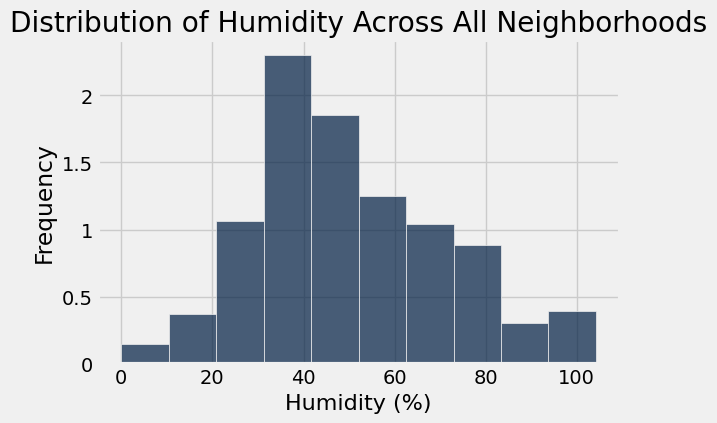

In [40]:
joined_table.hist('humidity')
plt.title('Distribution of Humidity Across All Neighborhoods')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [41]:
# Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows: "Good" if pm25 < 12 "Moderate" if 12 <= pm25 < 35 "Unhealthy" if pm25 >= 35
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return "Good"
    elif 12 <= pm25 < 35:
        return "Moderate"
    else:
        return "Unhealthy"

In [44]:
# Apply the function to create the 'PM25_Category' column
joined_table = joined_table.with_column(
    'PM25_Category', joined_table.apply(calculate_pm25_category, 'pm25')
)
joined_table

pm10,neighborhood,temperature,humidity,pm25,borough,PM25_Category
11.35,Bronx Park,16.3,15.2,5.91,Bronx,Good
1.18,Bronx Park,16.2,15.1,1.18,Bronx,Good
0.76,Bronx Park,16.1,15.1,0.76,Bronx,Good
47.36,Bronx Park,16.1,15.2,4.48,Bronx,Good
6.18,Bronx Park,16,15.2,5.77,Bronx,Good
0.73,Bronx Park,15.9,15.3,0.73,Bronx,Good
1.22,Bronx Park,15.8,15.4,1.22,Bronx,Good
5.82,Bronx Park,15.8,15.4,4.57,Bronx,Good
11.04,Bronx Park,15.7,15.5,5.61,Bronx,Good
1.29,Bronx Park,15.6,15.6,1.29,Bronx,Good


In [45]:
# Group by 'PM25_Category' and count how many time it occurr
pm25_category_counts = joined_table.group('PM25_Category')

# Display the results
pm25_category_counts.show()

PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [49]:
# Sample 10% of the rows without replacement
sample_data = joined_table.sample(k=int(joined_table.num_rows * 0.1), with_replacement=False)


In [50]:
# Calculate the mean pm25 level for the sampled data
mean_pm25_sample = np.mean(sample_data.column('pm25'))

# Print the mean pm25 level
print("Mean PM2.5 level for the sampled data:", mean_pm25_sample)

Mean PM2.5 level for the sampled data: 7.35772554646


In [51]:
# Create an empty list to store the mean pm25 values
mean_pm25_values = []

# Repeat the sampling process 100 times
for _ in range(100):
    # Sample 10% of the rows without replacement
    sample_data = joined_table.sample(k=int(joined_table.num_rows * 0.1), with_replacement=False)

    # Calculate the mean pm25 level for the sampled data
    mean_pm25_sample = np.mean(sample_data.column('pm25'))

    # Append the mean pm25 value to the list
    mean_pm25_values.append(mean_pm25_sample)

# Print the list of mean pm25 values
print("Mean PM2.5 values from 100 samples:", mean_pm25_values)

Mean PM2.5 values from 100 samples: [7.1125934678031895, 7.1882808675837628, 7.3789534981855009, 7.4563507468984724, 7.0613258502827234, 7.3933775002109883, 7.3788513798632804, 7.3894995358258075, 7.2745067094269551, 7.7776099248881758, 7.597944130306356, 7.2384150561228804, 7.4569423580048948, 7.1400227867330583, 7.5217385433369905, 7.0795088193096456, 7.5847852139421041, 7.4347987171913239, 7.4518111233015452, 7.5503510844797033, 7.3195164148873317, 7.0795400455734665, 7.2335665457000591, 7.8187357582918384, 7.2701578192252505, 7.3070917376993831, 7.2186834332011145, 7.1717832728500293, 7.6083948012490499, 7.6044180943539539, 7.1986403915942274, 7.3988977972824719, 7.4189332433116721, 7.8242923453455981, 7.2111697189636255, 7.2635218161870201, 7.4544813908346708, 7.8355042619630346, 7.1858477508650518, 7.2330323234028189, 7.3437091737699385, 7.7116929698708754, 7.6356730525782766, 7.8881441471854163, 7.2288243733648407, 7.606364250147692, 7.6148991476073933, 7.2785399611781587, 7.148

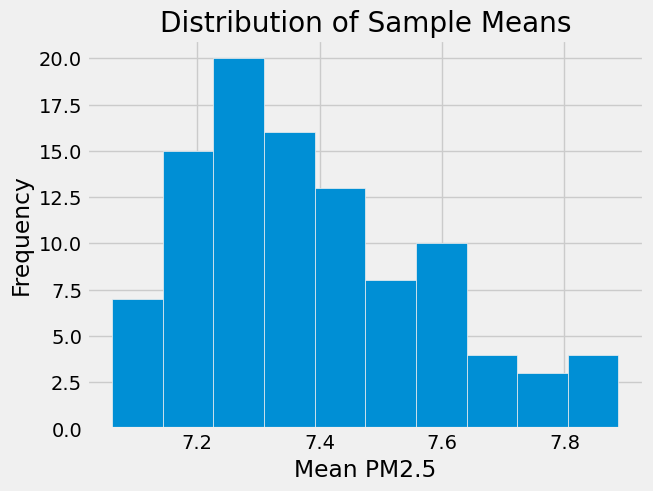

In [52]:
# Create the histogram
plt.hist(mean_pm25_values)
plt.title('Distribution of Sample Means')
plt.xlabel('Mean PM2.5')
plt.ylabel('Frequency')
plt.show()


# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.